In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [ ]:
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Normalize pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


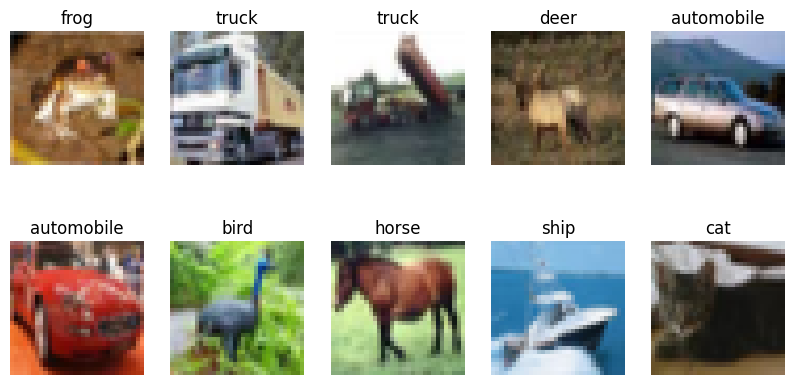

In [ ]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()


In [ ]:
baseline_model = models.Sequential()

# First Convolution Block
baseline_model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
baseline_model.add(layers.MaxPooling2D((2,2)))

# Second Convolution Block
baseline_model.add(layers.Conv2D(64, (3,3), activation='relu'))
baseline_model.add(layers.MaxPooling2D((2,2)))

# Flatten + Dense
baseline_model.add(layers.Flatten())
baseline_model.add(layers.Dense(64, activation='relu'))
baseline_model.add(layers.Dense(10, activation='softmax'))

baseline_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
baseline_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history_baseline = baseline_model.fit(
    x_train, y_train_cat,
    epochs=15,
    batch_size=64,
    validation_data=(x_test, y_test_cat)
)


Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3622 - loss: 1.7552 - val_accuracy: 0.5578 - val_loss: 1.2496
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5803 - loss: 1.2039 - val_accuracy: 0.6200 - val_loss: 1.0989
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6343 - loss: 1.0552 - val_accuracy: 0.6366 - val_loss: 1.0460
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6673 - loss: 0.9584 - val_accuracy: 0.6614 - val_loss: 0.9820
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6915 - loss: 0.8898 - val_accuracy: 0.6770 - val_loss: 0.9419
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7086 - loss: 0.8481 - val_accuracy: 0.6762 - val_loss: 0.9341
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7244 - loss: 0.7985 - val_accuracy: 0.6893 - val_loss: 0.9186
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7352 - loss: 0.7694 - val_accuracy: 0.

In [ ]:
test_loss, test_acc = baseline_model.evaluate(x_test, y_test_cat)
print("Baseline Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7037 - loss: 0.9127
Baseline Test Accuracy: 0.7057999968528748


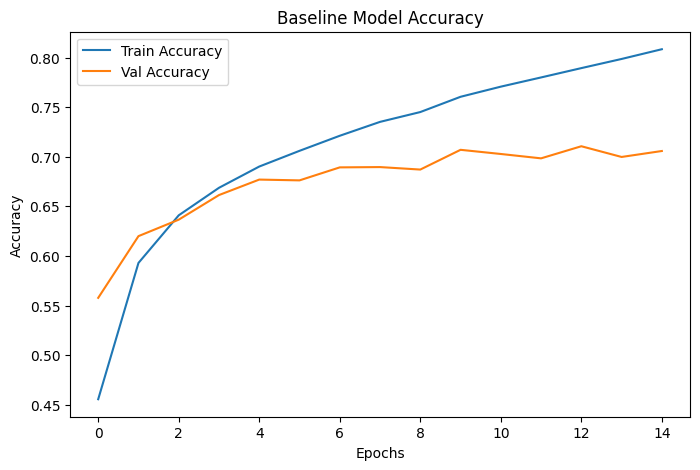

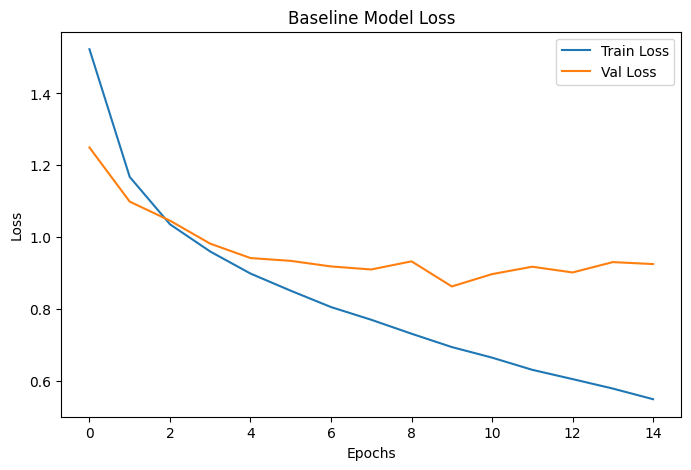

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history_baseline.history['accuracy'], label='Train Accuracy')
plt.plot(history_baseline.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Baseline Model Accuracy')
plt.show()


plt.figure(figsize=(8,5))
plt.plot(history_baseline.history['loss'], label='Train Loss')
plt.plot(history_baseline.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Baseline Model Loss')
plt.show()


In [ ]:
improved_model = models.Sequential()

# Block 1
improved_model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
improved_model.add(layers.BatchNormalization())
improved_model.add(layers.MaxPooling2D((2,2)))

# Block 2
improved_model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
improved_model.add(layers.BatchNormalization())
improved_model.add(layers.MaxPooling2D((2,2)))

# Block 3 (New)
improved_model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
improved_model.add(layers.BatchNormalization())
improved_model.add(layers.MaxPooling2D((2,2)))

# Classifier
improved_model.add(layers.Flatten())
improved_model.add(layers.Dense(128, activation='relu'))
improved_model.add(layers.Dropout(0.5))
improved_model.add(layers.Dense(10, activation='softmax'))

improved_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
improved_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(x_train)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_accuracy',   # better for classification
    patience=10,              # was too small before
    restore_best_weights=True
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-5
)


In [ ]:
history_aug = improved_model.fit(
    datagen.flow(x_train, y_train_cat, batch_size=64),
    epochs=40,
    validation_data=(x_test, y_test_cat),
    callbacks=[early_stop, lr_scheduler]
)





Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 50ms/step - accuracy: 0.3049 - loss: 1.9740 - val_accuracy: 0.4822 - val_loss: 1.3958 - learning_rate: 0.0010
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.4612 - loss: 1.4844 - val_accuracy: 0.5763 - val_loss: 1.1537 - learning_rate: 0.0010
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.5337 - loss: 1.3046 - val_accuracy: 0.6249 - val_loss: 1.0691 - learning_rate: 0.0010
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5742 - loss: 1.2077 - val_accuracy: 0.5795 - val_loss: 1.2597 - learning_rate: 0.0010
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6138 - loss: 1.1078 - val_accuracy: 0.6742 - val_loss: 0.9129 - learning_rate: 0.0010
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.6340 - loss: 1.0504 - val_accuracy: 0.6944 - val_loss: 0.8972 - learning_rate: 0.0010
Epoch 7/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6578 - loss: 0.9880

In [ ]:
test_loss_improved, test_acc_improved = improved_model.evaluate(x_test, y_test_cat)
print("Improved Model Test Accuracy:", test_acc_improved)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8363 - loss: 0.5141
Improved Model Test Accuracy: 0.8342999815940857


In [ ]:
baseline_model.save("baseline_cifar10_model.keras")
improved_model.save("improved_cifar10_model.keras")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p /content/drive/MyDrive/cifar10_project


In [ ]:
%cd /content/drive/MyDrive/cifar10_project


/content/drive/MyDrive/cifar10_project


In [ ]:
%%writefile /content/drive/MyDrive/cifar10_project/train.py
# paste the training code here
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# -----------------------
# Load dataset
# -----------------------
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# -----------------------
# Data augmentation
# -----------------------
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(x_train)

# -----------------------
# Build improved CNN
# -----------------------
model = models.Sequential([

    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------
# Callbacks
# -----------------------
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5
)

# -----------------------
# Train
# -----------------------
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=40,
    validation_data=(x_test, y_test),
    callbacks=[early_stop, lr_scheduler]
)

# -----------------------
# Save model
# -----------------------
model.save("improved_cifar10_model.keras")

print("Training complete. Model saved.")


Overwriting /content/drive/MyDrive/cifar10_project/train.py


In [ ]:
%%writefile /content/drive/MyDrive/cifar10_project/evaluate.py
# paste evaluation code here
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import datasets
from sklearn.metrics import confusion_matrix, classification_report

class_names = [
    'airplane','automobile','bird','cat','deer',
    'dog','frog','horse','ship','truck'
]

# -----------------------
# Load model
# -----------------------
model = tf.keras.models.load_model("improved_cifar10_model.keras")

# -----------------------
# Load test data
# -----------------------
(_, _), (x_test, y_test) = datasets.cifar10.load_data()

x_test = x_test / 255.0
y_true = y_test.flatten()

# -----------------------
# Predictions
# -----------------------
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# -----------------------
# Accuracy
# -----------------------
accuracy = np.mean(y_pred == y_true)
print("Test Accuracy:", accuracy)

# -----------------------
# Confusion Matrix
# -----------------------
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# -----------------------
# Classification Report
# -----------------------
print(classification_report(y_true, y_pred, target_names=class_names))


Overwriting /content/drive/MyDrive/cifar10_project/evaluate.py


In [ ]:
improved_model.save("/content/drive/MyDrive/cifar10_project/improved_cifar10_model.keras")



In [30]:
%cd /content/drive/MyDrive/cifar10_project



/content/drive/MyDrive/cifar10_project


In [32]:
!git init


Reinitialized existing Git repository in /content/drive/MyDrive/cifar10_project/.git/


In [33]:
!git config --global user.email "mishrashalin599@gmail.com"
!git config --global user.name "Shalin1204"